<font size="15">**Sentiment Analysis using xLSTM**</font>

By Ammar Al-Mekhlafi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#from string import punctuation 
#from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sentiment-analysis-dataset/training.1600000.processed.noemoticon.csv
/kaggle/input/sentiment-analysis-dataset/train.csv
/kaggle/input/sentiment-analysis-dataset/testdata.manual.2009.06.14.csv
/kaggle/input/sentiment-analysis-dataset/test.csv


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<font size="10">Loading training and testing datasets</font>

In [3]:
train_data = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/train.csv',encoding='latin1');
test_data = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/test.csv',encoding='latin1');
df = pd.concat([train_data,test_data])

In [4]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


<font size="10">Data information</font>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32296 entries, 0 to 4814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.7+ MB


<font size="10">Remove Unnecessary Characters</font>

<font size="10">Tokenization</font>

<font size="10">Remove Stopwords</font>

In [6]:
def remove_unnecessary_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text
df['clean_text'] = df['text'].apply(remove_unnecessary_characters)

def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []
df['tokens'] = df['text'].apply(tokenize_text)

def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = str(text)
    return text
df['normalized_text'] = df['text'].apply(normalize_text)

def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()        
        filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
        filtered_text = ' '.join(filtered_words)
    else:
        filtered_text = ''
    return filtered_text
df['text_without_stopwords'] = df['text'].apply(remove_stopwords)

<font size="10">Remove Missing Values</font>

In [7]:
df.dropna(inplace=True)

<font size="10">Check classes balance</font>

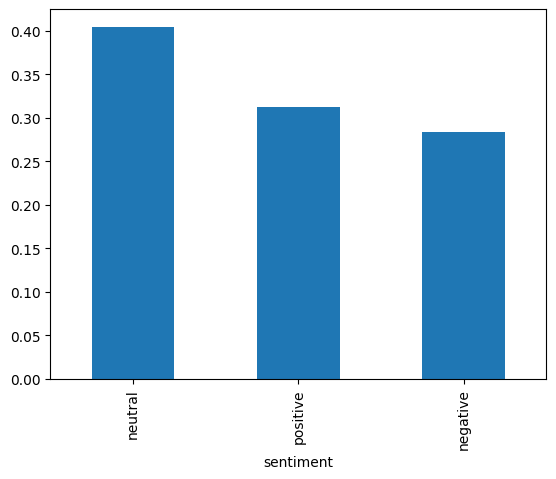

In [8]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar');

<font size="10">Categorization</font>

In [9]:
df['sentiment'].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

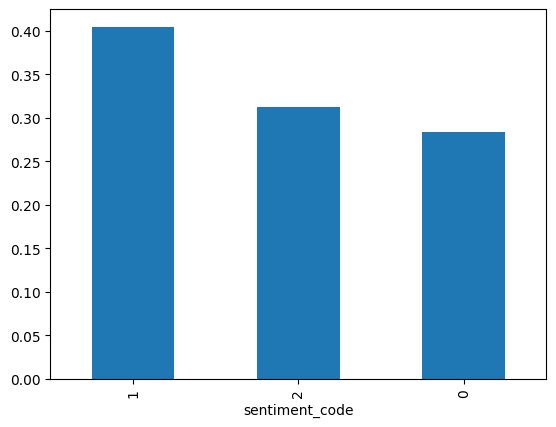

In [10]:
df['sentiment_code'] = df['sentiment'].astype('category').cat.codes
sentiment_distribution = df['sentiment_code'].value_counts(normalize=True)
sentiment_distribution.plot(kind='bar')
plt.show()

<font size="10">Visualization Using Histplot</font>

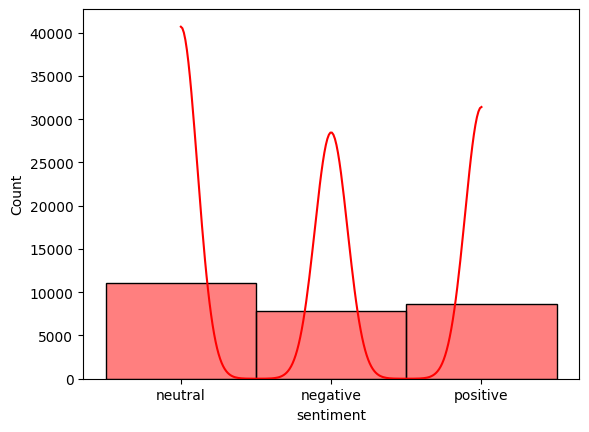

In [11]:
sns.histplot(df['sentiment'], kde=True, color = 'r')
plt.show()

<font size="10">Stems Words Using the Lancaster Stemmer</font>

In [12]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

27480
 I`d have responded, if I were going


<font size="10">Word Frequency Distribution</font>

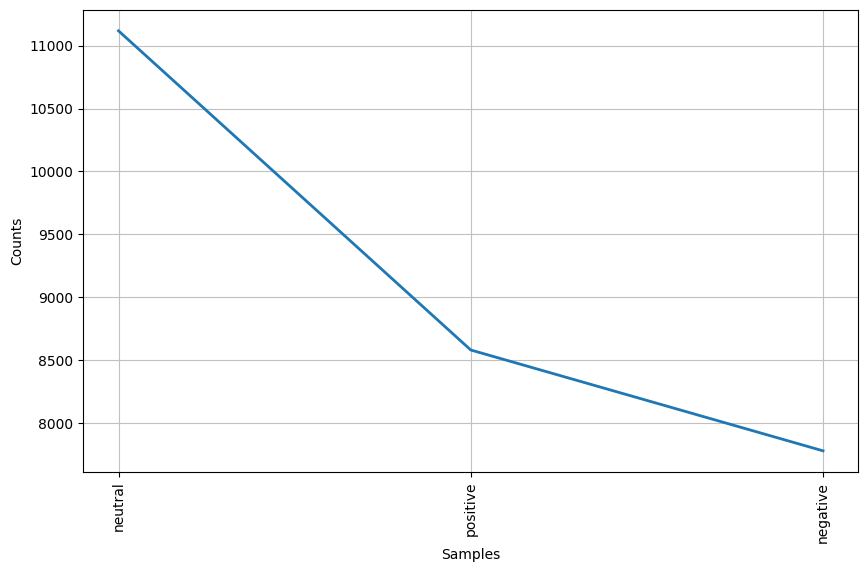

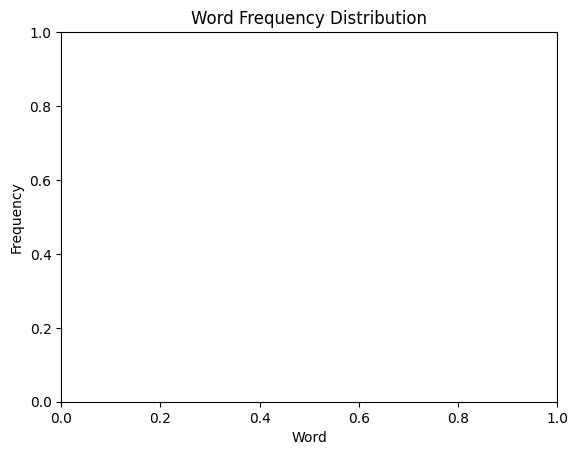

In [13]:
from nltk.probability import FreqDist
word_freq = FreqDist(word_tokenize(' '.join(df['sentiment'])))
plt.figure(figsize=(10, 6))
word_freq.plot(20, cumulative=False)
plt.title('Word Frequency Distribution')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

<font size="10">Convert To Strings</font>

In [14]:
final_corpus = df['text'].astype(str).tolist()
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df["sentiment"].values
data_eda.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [15]:
df['Time of Tweet'] = df['Time of Tweet'].astype('category').cat.codes
df['Country'] = df['Country'].astype('category').cat.codes
df['Age of User']=df['Age of User'].replace({'0-20':18,'21-30':25,'31-45':38,'46-60':53,'60-70':65,'70-100':80})

<font size="10">Removing Irrelevent Columns</font>

In [16]:
df=df.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])

<font size="10">Preprocessing</font>

In [17]:
import string
def wp(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df['selected_text'] = df["selected_text"].apply(wp) 

In [26]:
text_sizes = df["selected_text"].apply(lambda x: len(x))

In [27]:
max(text_sizes)

140

In [18]:
X=df['selected_text']
y= df['sentiment']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

<font size="10">**xLSTM Model Training**</font>

I found that xLSTM[1:0] (mLSTM block only) shows good results

In [21]:
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import TfidfVectorizer

class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx].todense(), dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.long)

# Create Dataset and DataLoader
train_dataset = TextDataset(XV_train, y_train)
test_dataset = TextDataset(XV_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

from sklearn.preprocessing import LabelEncoder

# Assuming y_train and y_test are the labels in string format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Create Dataset and dataLoader using the encoded labels
train_dataset = TextDataset(XV_train, y_train_encoded)
test_dataset = TextDataset(XV_test, y_test_encoded)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Vectorize the text data
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

# Create a PyTorch Dataset
class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx].todense(), dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.long)

# Create DataLoader
train_dataset = TextDataset(XV_train, y_train_encoded)
test_dataset = TextDataset(XV_test, y_test_encoded)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the Model Components
class CausalConv1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, dilation=1, **kwargs):
        super(CausalConv1D, self).__init__()
        self.padding = (kernel_size - 1) * dilation
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, padding=self.padding, dilation=dilation, **kwargs)

    def forward(self, x):
        x = self.conv(x)
        return x[:, :, :-self.padding]

class BlockDiagonal(nn.Module):
    def __init__(self, in_features, out_features, num_blocks):
        super(BlockDiagonal, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.num_blocks = num_blocks
        self.blocks = nn.ModuleList([nn.Linear(in_features // num_blocks, out_features // num_blocks) for _ in range(num_blocks)])

    def forward(self, x):
        x = x.chunk(self.num_blocks, dim=-1)
        x = [block(x_i) for block, x_i in zip(self.blocks, x)]
        return torch.cat(x, dim=-1)

class sLSTMBlock(nn.Module):
    def __init__(self, input_size, hidden_size, num_heads, proj_factor=4/3, dropout_prob=0.3):
        super(sLSTMBlock, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_heads = num_heads
        self.head_size = hidden_size // num_heads  # Initialize head_size
        self.proj_factor = proj_factor
        self.layer_norm = nn.LayerNorm(input_size)
        self.causal_conv = CausalConv1D(1, 1, 4)
        self.Wz = BlockDiagonal(input_size, hidden_size, num_heads)
        self.Wi = BlockDiagonal(input_size, hidden_size, num_heads)
        self.Wf = BlockDiagonal(input_size, hidden_size, num_heads)
        self.Wo = BlockDiagonal(input_size, hidden_size, num_heads)
        self.Rz = BlockDiagonal(hidden_size, hidden_size, num_heads)
        self.Ri = BlockDiagonal(hidden_size, hidden_size, num_heads)
        self.Rf = BlockDiagonal(hidden_size, hidden_size, num_heads)
        self.Ro = BlockDiagonal(hidden_size, hidden_size, num_heads)
        self.group_norm = nn.GroupNorm(num_heads, hidden_size)
        self.up_proj_left = nn.Linear(hidden_size, int(hidden_size * proj_factor))
        self.up_proj_right = nn.Linear(hidden_size, int(hidden_size * proj_factor))
        self.down_proj = nn.Linear(int(hidden_size * proj_factor), hidden_size)
        self.dropout = nn.Dropout(dropout_prob)  # Added dropout

    def forward(self, x, prev_state):
        h_prev, c_prev, n_prev, m_prev = prev_state
        x_norm = self.layer_norm(x)
        x_conv = F.silu(self.causal_conv(x_norm.unsqueeze(1)).squeeze(1))
        z = torch.tanh(self.Wz(x) + self.Rz(h_prev))
        o = torch.sigmoid(self.Wo(x) + self.Ro(h_prev))
        i_tilde = self.Wi(x_conv) + self.Ri(h_prev)
        f_tilde = self.Wf(x_conv) + self.Rf(h_prev)
        m_t = torch.max(f_tilde + m_prev, i_tilde)
        i = torch.exp(i_tilde - m_t)
        f = torch.exp(f_tilde + m_prev - m_t)
        c_t = f * c_prev + i * z
        n_t = f * n_prev + i
        h_t = o * c_t / n_t
        output = h_t
        output_norm = self.group_norm(output)
        output_left = self.up_proj_left(output_norm)
        output_right = self.up_proj_right(output_norm)
        output_gated = F.gelu(output_right)
        output = output_left * output_gated
        output = self.down_proj(output)
        output = self.dropout(output)  # Apply dropout
        return output + h_prev, (h_t, c_t, n_t, m_t)

class mLSTMBlock(nn.Module):
    def __init__(self, input_size, hidden_size, num_heads, proj_factor=2, dropout_prob=0.3):
        super(mLSTMBlock, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_heads = num_heads
        self.head_size = hidden_size // num_heads  # Initialize head_size
        self.proj_factor = proj_factor

        self.layer_norm = nn.LayerNorm(input_size)
        self.up_proj_left = nn.Linear(input_size, int(input_size * proj_factor))
        self.up_proj_right = nn.Linear(input_size, hidden_size)
        self.down_proj = nn.Linear(hidden_size, hidden_size)
        self.causal_conv = CausalConv1D(1, 1, 4)
        self.skip_connection = nn.Linear(int(input_size * proj_factor), hidden_size)
        self.Wq = BlockDiagonal(int(input_size * proj_factor), hidden_size, num_heads)
        self.Wk = BlockDiagonal(int(input_size * proj_factor), hidden_size, num_heads)
        self.Wv = BlockDiagonal(int(input_size * proj_factor), hidden_size, num_heads)
        self.Wi = nn.Linear(int(input_size * proj_factor), hidden_size)
        self.Wf = nn.Linear(int(input_size * proj_factor), hidden_size)
        self.Wo = nn.Linear(int(input_size * proj_factor), hidden_size)
        self.group_norm = nn.GroupNorm(num_heads, hidden_size)
        self.dropout = nn.Dropout(dropout_prob)  # Added dropout

    def forward(self, x, prev_state):
        h_prev, c_prev, n_prev, m_prev = prev_state
        x_norm = self.layer_norm(x)
        x_up_left = self.up_proj_left(x_norm)
        x_up_right = self.up_proj_right(x_norm)
        x_conv = F.silu(self.causal_conv(x_up_left.unsqueeze(1)).squeeze(1))
        x_skip = self.skip_connection(x_conv)
        q = self.Wq(x_conv)
        k = self.Wk(x_conv) / (self.head_size ** 0.5)  # Use self.head_size here
        v = self.Wv(x_up_left)
        i_tilde = self.Wi(x_conv)
        f_tilde = self.Wf(x_conv)
        o = torch.sigmoid(self.Wo(x_up_left))
        m_t = torch.max(f_tilde + m_prev, i_tilde)
        i = torch.exp(i_tilde - m_t)
        f = torch.exp(f_tilde + m_prev - m_t)
        c_t = f * c_prev + i * (v * k)
        n_t = f * n_prev + i * k
        h_t = o * (c_t * q) / torch.max(torch.abs(n_t), torch.tensor(1.0, device=x.device))
        output = h_t
        output_norm = self.group_norm(output)
        output = output_norm + x_skip
        output = output * F.silu(x_up_right)
        output = self.down_proj(output)
        output = self.dropout(output)  # Apply dropout
        return output + h_prev, (h_t, c_t, n_t, m_t)

class xLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_heads, layers, batch_first=False, proj_factor_slstm=4/3, proj_factor_mlstm=2, dropout_prob=0.3):
        super(xLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.layers = nn.ModuleList()
        for i, layer_type in enumerate(layers):
            if layer_type == 's':
                layer = sLSTMBlock(input_size if i == 0 else hidden_size, hidden_size, num_heads, proj_factor_slstm, dropout_prob=dropout_prob)
            elif layer_type == 'm':
                layer = mLSTMBlock(input_size if i == 0 else hidden_size, hidden_size, num_heads, proj_factor_mlstm, dropout_prob=dropout_prob)
            self.layers.append(layer)

        self.batch_first = batch_first

    def forward(self, x, state=None):
        if self.batch_first:
            x = x.transpose(0, 1)

        if state is not None:
            state = torch.stack(list(state))
            state = state.transpose(0, 1)
        else:
            state = torch.zeros(len(self.layers), 4, x.size(1), self.hidden_size, device=x.device)

        output = []
        for t in range(x.size(0)):
            x_t = x[t]
            for layer in range(len(self.layers)):
                x_t, state_tuple = self.layers[layer](x_t, tuple(state[layer].clone()))
                state[layer] = torch.stack(list(state_tuple))
            output.append(x_t)

        output = torch.stack(output)
        state = tuple(state.transpose(0, 1))

        if self.batch_first:
            output = output.transpose(0, 1)

        return output, state

class TextClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_heads, layers, num_classes, batch_first=False, dropout_prob=0.3):
        super(TextClassifier, self).__init__()
        self.xlstm = xLSTM(input_size, hidden_size, num_heads, layers, batch_first=batch_first, dropout_prob=dropout_prob)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout_prob)  # Added dropout

    def forward(self, x, state=None):
        x, state = self.xlstm(x, state)
        x = x[:, -1, :] if self.xlstm.batch_first else x[-1]
        x = self.dropout(x) 
        return self.fc(x)

# Data preparation and model instantiation
input_size = XV_train.shape[1]
hidden_size = 128
num_heads = 1
num_classes = len(set(y_train_encoded))
learning_rate = 0.00001
num_epochs = 10


#model_1_1 = TextClassifier(input_size, hidden_size, num_heads, ['m', 's'], num_classes, batch_first=True).to(device)
model_1_0 = TextClassifier(input_size, hidden_size, num_heads, ['m'], num_classes, batch_first=True).to(device)
#model_7_1 = TextClassifier(input_size, hidden_size, num_heads, ['m'] * 7 + ['s'], num_classes, batch_first=True).to(device)

#optimizer_1_1 = torch.optim.Adam(model_1_1.parameters(), lr=learning_rate)
optimizer_1_0 = torch.optim.Adam(model_1_0.parameters(), lr=learning_rate)
#optimizer_7_1 = torch.optim.Adam(model_7_1.parameters(), lr=learning_rate)


# Training loop
def train_model(model, optimizer, train_loader, test_loader, num_epochs, save_path='models'):
    # Create directory if it doesn't exist
    os.makedirs(save_path, exist_ok=True)
    
    train_losses, val_losses, train_accuracies, val_accuracies, epochs = [], [], [], [], []
    best_val_acc = 0.0
    best_model_path = ""
    for epoch in range(num_epochs):
        model.train()
        train_loss, correct, total = 0, 0, 0

        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)  # Move data to gpu
            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

        train_acc = correct / total
        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(train_acc)

        model.eval()
        val_loss, correct, total = 0, 0, 0

        with torch.no_grad():
            for x_batch, y_batch in test_loader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)  # Move data to GPU
                outputs = model(x_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

        val_acc = correct / total
        val_losses.append(val_loss / len(test_loader))
        val_accuracies.append(val_acc)
        epochs.append(epoch + 1)

        # Save the model after each epoch
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_path = os.path.join(save_path, f'model_epoch_{epoch + 1}.pth')
            torch.save(model.state_dict(), best_model_path)
            print(f'New best model saved with validation accuracy {val_acc:.4f} to {best_model_path}')

        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.4f}')
    return best_model_path, (train_losses, val_losses, train_accuracies, val_accuracies, epochs)

# Train each model
criterion = nn.CrossEntropyLoss()
# train_1_1 = train_model(model_1_1, optimizer_1_1, train_loader, test_loader, num_epochs)
best_model_path, train_1_0 = train_model(model_1_0, optimizer_1_0, train_loader, test_loader, num_epochs)
#train_7_1 = train_model(model_7_1, optimizer_7_1, train_loader, test_loader, num_epochs)

New best model saved with validation accuracy 0.8102 to models/model_epoch_1.pth
Epoch 1/10, Train Loss: 0.6916, Train Accuracy: 0.7331, Val Loss: 0.5096, Val Accuracy: 0.8102
Epoch 2/10, Train Loss: 0.3402, Train Accuracy: 0.8943, Val Loss: 0.4805, Val Accuracy: 0.8095
New best model saved with validation accuracy 0.8162 to models/model_epoch_3.pth
Epoch 3/10, Train Loss: 0.1802, Train Accuracy: 0.9498, Val Loss: 0.5424, Val Accuracy: 0.8162
New best model saved with validation accuracy 0.8182 to models/model_epoch_4.pth
Epoch 4/10, Train Loss: 0.1067, Train Accuracy: 0.9699, Val Loss: 0.5902, Val Accuracy: 0.8182
Epoch 5/10, Train Loss: 0.0690, Train Accuracy: 0.9813, Val Loss: 0.6718, Val Accuracy: 0.8124
Epoch 6/10, Train Loss: 0.0502, Train Accuracy: 0.9854, Val Loss: 0.7531, Val Accuracy: 0.8151
Epoch 7/10, Train Loss: 0.0420, Train Accuracy: 0.9872, Val Loss: 0.7849, Val Accuracy: 0.8160
Epoch 8/10, Train Loss: 0.0347, Train Accuracy: 0.9900, Val Loss: 0.8419, Val Accuracy: 0.81

<font size="10">Select best epoch</font>

In [23]:
model_1_0.load_state_dict(torch.load(best_model_path))

<All keys matched successfully>

<font size="10">**Testing**</font>

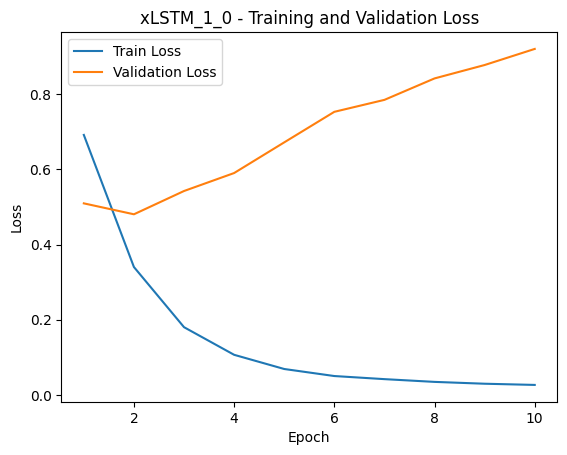

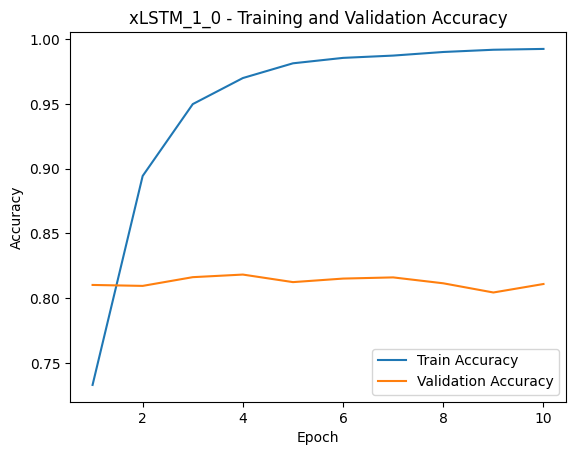

In [24]:
# Save and plot results
def save_plots_and_logs(train_data, model_name):
    train_losses, val_losses, train_accuracies, val_accuracies, epochs = train_data

    plt.figure()
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.legend()
    plt.savefig(f'{model_name}_loss_plot.png')

    plt.figure()
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Training and Validation Accuracy')
    plt.legend()
    plt.savefig(f'{model_name}_accuracy_plot.png')

    log_data = {
        'Epoch': epochs,
        'Train Accuracy': train_accuracies,
        'Train Loss': train_losses,
        'Validation Accuracy': val_accuracies,
        'Validation Loss': val_losses
    }
    df = pd.DataFrame(log_data)
    df.to_excel(f'{model_name}_training_logs.xlsx', index=False)

# save_plots_and_logs(train_1_1, 'xLSTM_1_1')
save_plots_and_logs(train_1_0, 'xLSTM_1_0')
#save_plots_and_logs(train_7_1, 'xLSTM_7_1')



Evaluating model_1_0:
Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.81      0.80      1572
     neutral       0.81      0.82      0.82      2236
    positive       0.87      0.82      0.84      1688

    accuracy                           0.82      5496
   macro avg       0.82      0.82      0.82      5496
weighted avg       0.82      0.82      0.82      5496

Accuracy: 0.8182314410480349


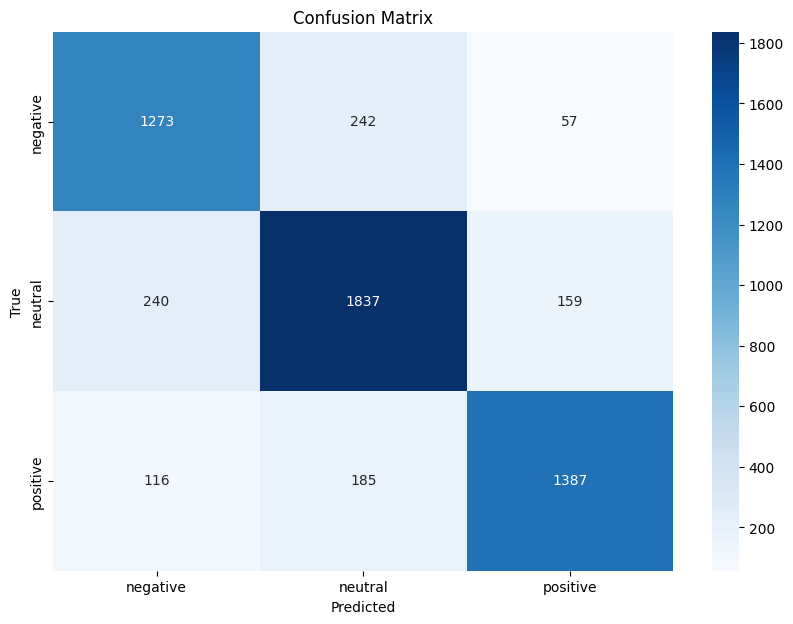

In [25]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

def evaluate_model(model, test_loader, label_encoder):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)  # Move data to GPU
            outputs = model(x_batch)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    # Decode the labels back to their original form
    all_labels = label_encoder.inverse_transform(all_labels)
    all_preds = label_encoder.inverse_transform(all_preds)

    # Classification report
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

    # Accuracy
    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy}")

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate the models
# print("Evaluating model_1_1:")
# evaluate_model(model_1_1, test_loader, label_encoder)

print("\nEvaluating model_1_0:")
evaluate_model(model_1_0, test_loader, label_encoder)


#print("\nEvaluating model_7_1:")
#evaluate_model(model_7_1, test_loader, label_encoder)


The xLSTM[1:0] model attained an accuracy of approxmatly 83%, marking the highest performance on Kaggle to date for models utilizing the Sentiment Analysis Dataset. Previous record was 0.8286.

<font size="10">References:</font>

* https://arxiv.org/pdf/2405.04517 (Sepp Hochreiter)
* https://medium.com/artefаct-engineering-and-data-science/how-to-train-a-language-model-from-scratch-without-any-linguistic-knowledge-11acaa933e84 (Amale Elhamri)
* https://www.kаggle.com/code/mohsinsial/sentiment-analysis-by-nlp (Mohsin sial)